In [74]:
# Imports
from Bio import SeqIO
import pysam
import plotly.graph_objects as go

from math import log10
import os.path
import sys

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import csv
import json

In [75]:
# Project imports
from common import *

In [76]:
# Megares hierarchy
config = dict()
config['DATABASE'] = dict()
config['DATABASE']['MEGARES'] = '/blue/boucher/marco.oliva/data/MEGARes/V2/megares_full_database_v2.00.fasta'
config['DATABASE']['MEGARES_ONTOLOGY'] = '/blue/boucher/marco.oliva/data/MEGARes/V2/megares_modified_annotations_v2.00.csv'

megares_ontology, hierarchy_dict = read_megares_v2_ontology(config)

# Gene lengths for coverage
megares_gene_lengths = {}
for rec in SeqIO.parse(config['DATABASE']['MEGARES'], "fasta"):
    megares_gene_lengths[rec.name] = len(rec.seq)

In [77]:
# Harcoded stuff
REPLICATES = dict()
REPLICATES['MOCK_TELS'] = ['T1_MOCK_D', 'T1_MOCK_E', 'T1_MOCK_F']
REPLICATES['BOVINE_FECAL_TELS_I'] = ['T1_BOV_A', 'T1_BOV_B', 'T1_BOV_C']
REPLICATES['BOVINE_FECAL_TELS_II'] = ['T2_BOV_A', 'T2_BOV_B', 'T2_BOV_C']
REPLICATES['BOVINE_FECAL_PB'] = ['PB_BOV_A', 'PB_BOV_B', 'PB_BOV_C']
REPLICATES['HUMAN_FECAL_TELS_II'] = ['T2_HU_A', 'T2_HU_B', 'T2_HU_C']
REPLICATES['HUMAN_FECAL_PB'] = ['PB_HU_A', 'PB_HU_B', 'PB_HU_C']
REPLICATES['SOIL_TELS_II'] = ['T2_SO_A', 'T2_SO_B', 'T2_SO_C']
REPLICATES['SOIL_PB'] = ['PB_SO_A', 'PB_SO_B', 'PB_SO_C']
REPLICATES['MOCK_GRIDION'] = ['T1_MOCK_GRIDION']
REPLICATES['MOCK_PROMETHION'] = ['T1_MOCK_PROMETHION']

########################################################

REPLICATES_DICT_READS = dict()

base = '/blue/boucher/marco.oliva/data/Noyes_TELS_I/ccs_fastqs/deduplicated_sequel-demultiplex.MOCK_{}01.ccs.fastq'
REPLICATES_DICT_READS['T1_MOCK_D'] = base.format('D')
REPLICATES_DICT_READS['T1_MOCK_E'] = base.format('D')
REPLICATES_DICT_READS['T1_MOCK_F'] = base.format('D')

base = '/blue/boucher/marco.oliva/data/Noyes_TELS_I/ccs_fastqs/deduplicated_sequel-demultiplex.1896_{}01.ccs.fastq'
REPLICATES_DICT_READS['T1_BOV_A'] = base.format('A')
REPLICATES_DICT_READS['T1_BOV_B'] = base.format('B')
REPLICATES_DICT_READS['T1_BOV_C'] = base.format('C')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/Deduplicated/deduplicated_sequel-demultiplex.BFXTA{}.ccs.fastq.gz'
REPLICATES_DICT_READS['T2_BOV_A'] = base.format('A')
REPLICATES_DICT_READS['T2_BOV_B'] = base.format('B')
REPLICATES_DICT_READS['T2_BOV_C'] = base.format('C')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/Deduplicated/deduplicated_sequel-demultiplex.BFXT{}.ccs.fastq.gz'
REPLICATES_DICT_READS['PB_BOV_A'] = base.format('NEGA')
REPLICATES_DICT_READS['PB_BOV_B'] = base.format('NEGAM')
REPLICATES_DICT_READS['PB_BOV_C'] = base.format('NEGM')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/Deduplicated/deduplicated_sequel-demultiplex.HFXTA{}.ccs.fastq.gz'
REPLICATES_DICT_READS['T2_HU_A'] = base.format('A')
REPLICATES_DICT_READS['T2_HU_B'] = base.format('B')
REPLICATES_DICT_READS['T2_HU_C'] = base.format('C')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/Deduplicated/deduplicated_sequel-demultiplex.HFXT{}.ccs.fastq.gz'
REPLICATES_DICT_READS['PB_HU_A'] = base.format('NEGA')
REPLICATES_DICT_READS['PB_HU_B'] = base.format('NEGAM')
REPLICATES_DICT_READS['PB_HU_C'] = base.format('NEGM')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/Deduplicated/deduplicated_sequel-demultiplex.SXTA{}.ccs.fastq.gz'
REPLICATES_DICT_READS['T2_SO_A'] = base.format('A')
REPLICATES_DICT_READS['T2_SO_B'] = base.format('B')
REPLICATES_DICT_READS['T2_SO_C'] = base.format('C')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/Deduplicated/deduplicated_sequel-demultiplex.SXT{}.ccs.fastq.gz'
REPLICATES_DICT_READS['PB_SO_A'] = base.format('NEGA')
REPLICATES_DICT_READS['PB_SO_B'] = base.format('NEGAM')
REPLICATES_DICT_READS['PB_SO_C'] = base.format('NEGM')

REPLICATES_DICT_READS['T1_MOCK_GRIDION'] = '/blue/boucher/marco.oliva/data/Noyes_TELS_I/loman/ERR3152366_1_concatenated.fastq.gz'
REPLICATES_DICT_READS['T1_MOCK_PROMETHION'] = '/blue/boucher/marco.oliva/data/Noyes_TELS_I/loman/ERR3152367_1_concatenated.fastq.gz'

########################################################


REPLICATES_DICT_RESISTOME = dict()
base = '/blue/boucher/marco.oliva/data/Noyes_TELS_I/ccs_fastqs/short_data_analysis_Dec_10/' + \
       'deduplicated_sequel-demultiplex.MOCK_{}01.ccs.fastq_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['T1_MOCK_D'] = base.format('D')
REPLICATES_DICT_RESISTOME['T1_MOCK_E'] = base.format('E')
REPLICATES_DICT_RESISTOME['T1_MOCK_F'] = base.format('F')

base = '/blue/boucher/marco.oliva/data/Noyes_TELS_I/ccs_fastqs/short_data_analysis_Dec_10/' + \
       'deduplicated_sequel-demultiplex.1896_{}01.ccs.fastq_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['T1_BOV_A'] = base.format('A')
REPLICATES_DICT_RESISTOME['T1_BOV_B'] = base.format('B')
REPLICATES_DICT_RESISTOME['T1_BOV_C'] = base.format('C')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/data_analysis/short_read_analysis_Dec_2/' + \
       'deduplicated_sequel-demultiplex.BFXTA{}.ccs.fastq.gz_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['T2_BOV_A'] = base.format('A')
REPLICATES_DICT_RESISTOME['T2_BOV_B'] = base.format('B')
REPLICATES_DICT_RESISTOME['T2_BOV_C'] = base.format('C')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/data_analysis/short_read_analysis_Dec_2/' + \
       'deduplicated_sequel-demultiplex.BFXT{}.ccs.fastq.gz_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['PB_BOV_A'] = base.format('NEGA')
REPLICATES_DICT_RESISTOME['PB_BOV_B'] = base.format('NEGAM')
REPLICATES_DICT_RESISTOME['PB_BOV_C'] = base.format('NEGM')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/data_analysis/short_read_analysis_Dec_2/' + \
       'deduplicated_sequel-demultiplex.HFXTA{}.ccs.fastq.gz_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['T2_HU_A'] = base.format('A')
REPLICATES_DICT_RESISTOME['T2_HU_B'] = base.format('B')
REPLICATES_DICT_RESISTOME['T2_HU_C'] = base.format('C')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/data_analysis/short_read_analysis_Dec_2/' + \
       'deduplicated_sequel-demultiplex.HFXT{}.ccs.fastq.gz_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['PB_HU_A'] = base.format('NEGA')
REPLICATES_DICT_RESISTOME['PB_HU_B'] = base.format('NEGAM')
REPLICATES_DICT_RESISTOME['PB_HU_C'] = base.format('NEGM')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/data_analysis/short_read_analysis_Dec_2/' + \
       'deduplicated_sequel-demultiplex.SXTA{}.ccs.fastq.gz_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['T2_SO_A'] = base.format('A')
REPLICATES_DICT_RESISTOME['T2_SO_B'] = base.format('B')
REPLICATES_DICT_RESISTOME['T2_SO_C'] = base.format('C')

base = '/blue/boucher/marco.oliva/data/Noyes_Project_026/Reads/data_analysis/short_read_analysis_Dec_2/' + \
       'deduplicated_sequel-demultiplex.SXT{}.ccs.fastq.gz_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['PB_SO_A'] = base.format('NEGA')
REPLICATES_DICT_RESISTOME['PB_SO_B'] = base.format('NEGAM')
REPLICATES_DICT_RESISTOME['PB_SO_C'] = base.format('NEGM')

base = '/blue/boucher/marco.oliva/data/Noyes_TELS_I/loman/short_ERR315236{}_Dec_3/ERR315236{}_1_concatenated.fastq.gz_SHORT_amr_diversity.csv'
REPLICATES_DICT_RESISTOME['T1_MOCK_GRIDION'] = base.format('6', '6')
REPLICATES_DICT_RESISTOME['T1_MOCK_PROMETHION'] = base.format('7', '7')

########################################################

with open('replicates_files_size.json', 'rt') as rep_dump:
    REPLICATES_DICT_DS_SIZE = json.load(rep_dump)
    
#REPLICATES_DICT_DS_SIZE = dict()
#for replicates_group, replicates_list in REPLICATES.items():
#    REPLICATES_DICT_DS_SIZE[replicates_group] = 0
#    for replicate in replicates_list:
#        print('Reading size of: {}'.format(replicate))
#        REPLICATES_DICT_DS_SIZE[replicates_group] += float(decompressed_file_size(REPLICATES_DICT_READS[replicate])) / float(10 ** 9)

In [81]:
absolute_abundances = dict()
for replicates_group, replicates_list in REPLICATES.items():
    replicates_absolute_abundance = dict()
    for replicate in replicates_list:
        with open(REPLICATES_DICT_RESISTOME[replicate]) as resistome_file:
            resistome_reader = csv.reader(resistome_file)
            for row in resistome_reader:
                # Remove statistics and headers
                if (row[0] == 'Statistics') or (row[0] == 'Resistome') or ('ARG_' in row[0]) or (row[0] == 'MEGARes Gene Header'):
                    continue
                    
                gene_acc = row[0]
                gene_acc_hits = row[1]
                
                if 'RequiresSNPConfirmation' in gene_acc:
                    continue
                
                if gene_acc not in replicates_absolute_abundance:
                    replicates_absolute_abundance[gene_acc] = 0
                    
                replicates_absolute_abundance[gene_acc] += int(gene_acc_hits)
                
    absolute_abundances[replicates_group] = replicates_absolute_abundance

In [82]:
# Convert absolute abundances to relative abundance
relative_abundances = {}
for replicates_group, replicates_absolute_abundance in absolute_abundances.items():
    replicates_relative_abundance = {}
    for gene_acc, gene_acc_hits in replicates_absolute_abundance.items():
        replicates_relative_abundance[gene_acc] = log10((100 * float(gene_acc_hits)) / (float(megares_gene_lengths[gene_acc] * REPLICATES_DICT_DS_SIZE[replicates_group])))

    relative_abundances[replicates_group] = replicates_relative_abundance

In [58]:
# Get Illumina results
illrelative_abundancesa_files_path = ['/blue/boucher/marco.oliva/data/Noyes_Project_033/data_analysis_Dec_6/BOV_AMR_SR_out/ResistomeResults/AMR_analytic_matrix.csv',
                       '/blue/boucher/marco.oliva/data/Noyes_Project_033/data_analysis_Dec_6/HUSOMO_AMR_SR_out/ResistomeResults/AMR_analytic_matrix.csv']
hits_per_sample = dict()
for illumina_file in illumina_files_path:
    with open(illumina_file) as matrix_handler:
        resistome_reader = csv.reader(matrix_handler)
        samples = next(resistome_reader)

        for sample in samples:
            hits_per_sample[sample] = dict()

        for row in resistome_reader:
            gene_acc = row[0]
            
            if 'RequiresSNPConfirmation' in gene_acc:
                    continue
                    
            for i in range(len(samples)):
                hits_per_sample[samples[i]][gene_acc] = float(row[i + 1])
                
for to_remove in ['MOXTNEGM_S14', 'MOXTNEGA_S13', 'MOXTNEGAM1_S15', 'MOV2NEGA_S16']:
    hits_per_sample.pop(to_remove, None) 

In [83]:
with open('illumina_files_size.json', 'rt') as ill_dump:
    ILLUMINA_FILES_SIZE = json.load(ill_dump)

#base = '/blue/boucher/marco.oliva/data/Noyes_Project_033/{s_type}/{s_name}_R{pair}_001.fastq.gz'
#ILLUMINA_FILES_SIZE = dict()
#for sample in hits_per_sample.keys():
#    if 'BOV' in sample:
#        sample_type = 'BOV'
#    else:
#        sample_type = 'HUSOMO'
#    print('working on: {} {}'.format(sample_type, sample))
#    ILLUMINA_FILES_SIZE[sample] = 0
#    ILLUMINA_FILES_SIZE[sample] += float(decompressed_file_size(base.format(s_type=sample_type, s_name=sample, pair='1'))) / float(10 ** 9)
#    ILLUMINA_FILES_SIZE[sample] += float(decompressed_file_size(base.format(s_type=sample_type, s_name=sample, pair='2'))) / float(10 ** 9)

In [85]:
ILLUMINA_REPLICATES = dict()
ILLUMINA_REPLICATES['ILL_BOV'] = ['BOV31NEG_S5', 'BOV32NEG_S6', 'BOV35NEG_S7']
ILLUMINA_REPLICATES['ILL_HU'] = ['H31NEG_S2', 'H32NEG_S3', 'H34NEG_S4']
ILLUMINA_REPLICATES['ILL_SO'] = ['SO14NEG_S10', 'SO15NEG_S11', 'SO17NEG_S12']

ILLUMINA_GROUP_FILES_SIZE = dict()
for replicates_group, replicates_list in ILLUMINA_REPLICATES.items():
    for replicate in replicates_list:
        if replicates_group not in ILLUMINA_GROUP_FILES_SIZE:
            ILLUMINA_GROUP_FILES_SIZE[replicates_group] = 0
        ILLUMINA_GROUP_FILES_SIZE[replicates_group] += ILLUMINA_FILES_SIZE[replicate]

In [86]:
illumina_absolute_abundance = dict()
for replicates_group, replicates_list in ILLUMINA_REPLICATES.items():
    replicates_group_absolute_aboundance = dict()
    for replicate in replicates_list:
        for gene_acc, gene_acc_hits in hits_per_sample[replicate].items():
            if gene_acc not in replicates_group_absolute_aboundance:
                replicates_group_absolute_aboundance[gene_acc] = 0
            replicates_group_absolute_aboundance[gene_acc] += gene_acc_hits
    
    illumina_absolute_abundance[replicates_group] = replicates_group_absolute_aboundance
    
illumina_relative_abundance = dict()
for replicates_group, replicates_absolute_abundance in illumina_absolute_abundance.items():
    replicates_relative_abundance = {}
    for gene_acc, gene_acc_hits in replicates_absolute_abundance.items():
        if gene_acc_hits != 0:
            replicates_relative_abundance[gene_acc] = log10((float(gene_acc_hits)) / (float(megares_gene_lengths[gene_acc] * ILLUMINA_GROUP_FILES_SIZE[replicates_group])))

    illumina_relative_abundance[replicates_group] = replicates_relative_abundance

In [87]:
tot_relative_abundances = relative_abundances
tot_relative_abundances.update(illumina_relative_abundance)

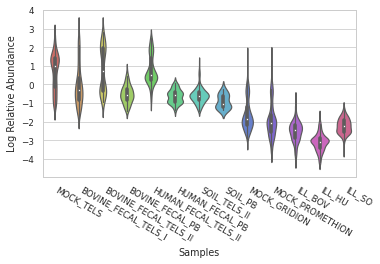

In [89]:
# Plot
df = pd.DataFrame.from_dict(tot_relative_abundances)
#df.rename(columns={df.columns[0]: "MOCK", 
#                   df.columns[1]: "TELS", 
#                   df.columns[2]: "BOVA"}, inplace = True)
sns.set_style("whitegrid")
sns.set_context("paper")
ax = sns.violinplot(data=df, inner='box', palette='hls')
ax.set(xlabel='Samples', ylabel='Log Relative Abundance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=-30, ha="left")
plt.gcf().subplots_adjust(bottom=0.30, right=0.85)
ax.get_figure().savefig('megares_violin.svg')
ax.get_figure().savefig('megares_violin.png', dpi=500)

In [69]:
# Store dataframe for future use
df.to_pickle('violin_plots_df.pkl')
df.to_csv('violin_plots_df.csv')